In [4]:

import os
import cv2
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
import numpy as np
from collections import Counter
import argparse
import torchvision.transforms.functional as TF
import configparser
from PIL import Image
import matplotlib.pyplot as plt



In [3]:

import os
import cv2
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
import numpy as np
from collections import Counter
import argparse
import torchvision.transforms.functional as TF
import configparser
from PIL import Image

ori_dir = '/data/codes/data/dataset'
aug_dir = '/data/codes/data/augmen'

folders = os.listdir(ori_dir)


for folder in folders:

    print(folder,'data augmentation start')

    for num in os.listdir(os.path.join(ori_dir,folder)):
        if 'DS_Store' in num:
            continue
        files = os.listdir(os.path.join(ori_dir,folder,num,"Masks"))
        if not(os.path.exists(os.path.join(aug_dir,folder,"Images"))):
            os.system('mkdir -p '+os.path.join(aug_dir,folder,"Images"))

        if not(os.path.exists(os.path.join(aug_dir,folder,"Masks"))):
            os.system('mkdir -p '+os.path.join(aug_dir,folder,"Masks"))

        for idx in tqdm(range(len(files))):
            img = cv2.imread(os.path.join(ori_dir,folder,num,"Images",files[idx][:-3]+'jpg'))      
            try :  
                pil_image = Image.fromarray(img)
            except :
                print(folder,files[idx],"Exception occur")
                continue
            flip_img = TF.hflip(pil_image)
            bright_img=TF.adjust_brightness(pil_image,0.7)
            cont_img=TF.adjust_contrast(pil_image,0.8)
            crop_img = img[100:,100:]
            cv2.imwrite(os.path.join(aug_dir,folder,"Images",'ori_%s_%sjpg'%(num,files[idx][:-3])),img)
            cv2.imwrite(os.path.join(aug_dir,folder,"Images",'flip_%s_%sjpg'%(num,files[idx][:-3])),np.array(flip_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Images",'bri_%s_%sjpg'%(num,files[idx][:-3])),np.array(bright_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Images",'cont_%s_%sjpg'%(num,files[idx][:-3])),np.array(cont_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Images",'crop_%s_%sjpg'%(num,files[idx][:-3])),crop_img)



            img = cv2.imread(os.path.join(ori_dir,folder,num,"Masks",files[idx]))
            pil_image = Image.fromarray(img)
            flip_img = TF.hflip(pil_image)
            bright_img=TF.adjust_brightness(pil_image,0.7)
            cont_img=TF.adjust_contrast(pil_image,0.8)
            crop_img = img[100:,100:]
            cv2.imwrite(os.path.join(aug_dir,folder,"Masks",'ori_%s_%spng'%(num,files[idx][:-3])),img)
            cv2.imwrite(os.path.join(aug_dir,folder,"Masks",'flip_%s_%spng'%(num,files[idx][:-3])),np.array(flip_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Masks",'bri_%s_%spng'%(num,files[idx][:-3])),np.array(bright_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Masks",'cont_%s_%spng'%(num,files[idx][:-3])),np.array(cont_img))
            cv2.imwrite(os.path.join(aug_dir,folder,"Masks",'crop_%s_%spng'%(num,files[idx][:-3])),crop_img)


r_cut_lilpa.mp4 data augmentation start


 80%|███████▉  | 363/454 [00:22<00:04, 19.08it/s]

r_cut_lilpa.mp4 .DS_Store Exception occur


100%|██████████| 454/454 [00:28<00:00, 15.91it/s]


NotADirectoryError: [Errno 20] Not a directory: '/data/codes/data/dataset/r_cut_lilpa.mp4/.DS_Store/Masks'

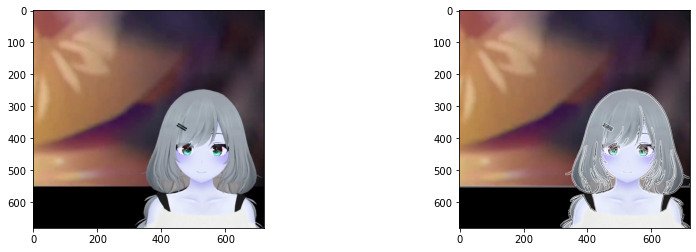

In [35]:
img = cv2.imread('/home/jini1114/git/data/dataset/viichan/1/Images/953.jpg')
plt.subplot(1,2,1)
plt.imshow(img)
# Canny Edge Detection
edges = cv2.Canny(image=img, threshold1=50, threshold2=200) # Canny Edge Detection
img2 = cv2.merge((edges,edges,edges))

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(img2,kernel,iterations = 1)
kernel = np.ones((4,4),np.uint8)
dilation2 = cv2.dilate(img2,kernel,iterations = 1)

img = img.astype(np.int16)
img = img +dilation2
img = img - dilation
img[img <0] = 0
img[img > 255] = 255
plt.subplot(1,2,2)
plt.imshow(img.astype(np.uint8))

plt.show()

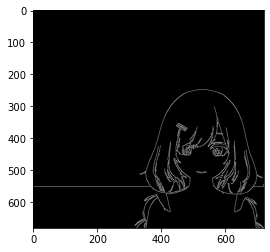

In [14]:
img2 = cv2.merge((edges,edges,edges))
plt.imshow(img2)

In [20]:
plt.rcParams['figure.figsize'] = [14,4]

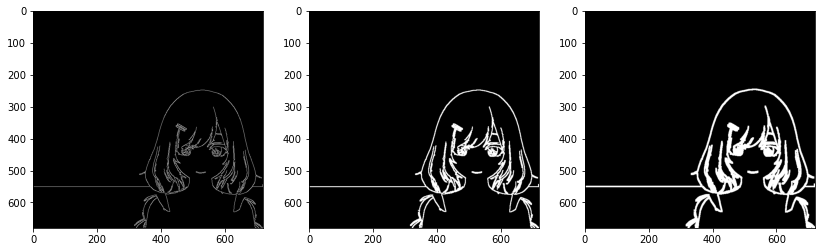

In [28]:

plt.subplot(1,3,1)
plt.imshow(img2,cmap='gray')

plt.subplot(1,3,2)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img2,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')

plt.subplot(1,3,3)
kernel = np.ones((5,5),np.uint8)
dilation2 = cv2.dilate(img2,kernel,iterations = 1)
plt.imshow(dilation2,cmap='gray')

plt.show()

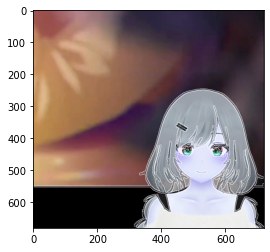

In [31]:
img = img.astype(np.int16)
img = img +dilation2
img = img - dilation
img[img <0] = 0
img[img > 255] = 255
plt.imshow(img.astype(np.uint8))

In [30]:
dilation2.shape

(680, 720, 3)